# Predicciones Meteorológicas (AEMET) - SPRINT I

Parte 4 - Exploratory Data Analysis


Mapa Coroplético: Mostrar en un mapa coroplético (choropleth map) las
temperaturas por provincia, filtradas por días, mes y año.

Comparador: Usando un gráfico de líneas, comparar 2 años de una misma
provincia, mostrar en la misma gráfica: media, mediana, min y máx, para cada año.

Outliers: Mostrar los valores de temperatura de un año usando un histograma,
diferenciando los valores atípicos para ese año. Para calcular los outliers se puede
usar el Z-Score, Tukey’s Fence o DBSCAN.

Definir y añadir 2 gráficos más.

Rango de colores fijo: vmin = -10.8°C, vmax = 36.4°C


/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_60943/3748692621.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cmax = gdf_unido.loc[gdf_unido['provincia']==prov_max, 'geometry'].centroid.iloc[0]
/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_60943/3748692621.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cmin = gdf_unido.loc[gdf_unido['provincia']==prov_min, 'geometry'].centroid.iloc[0]


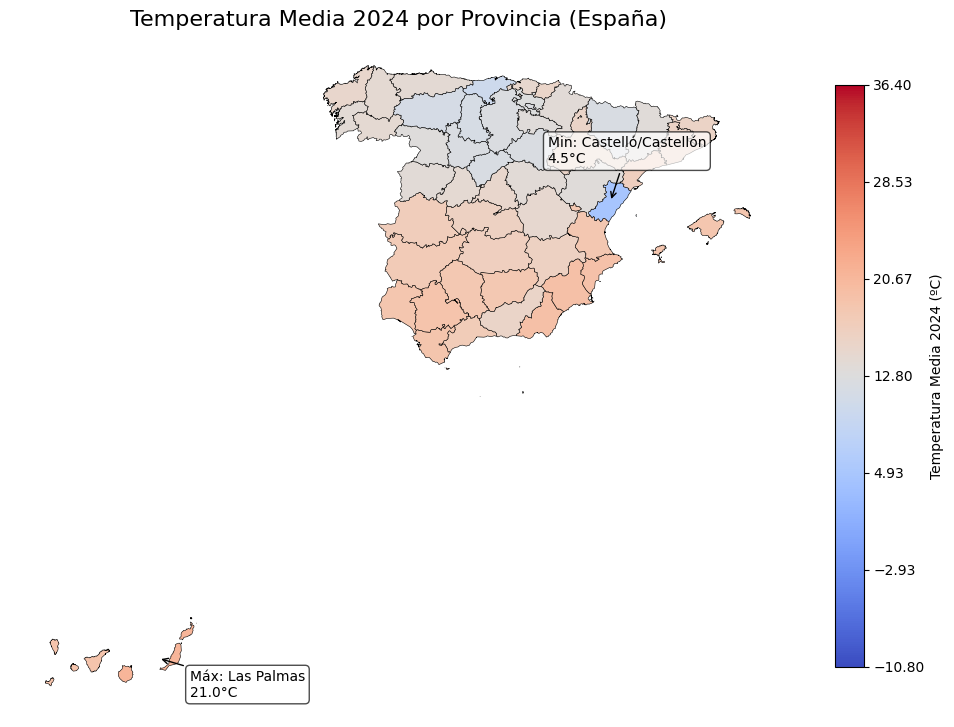

/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_60943/3748692621.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cmax = gdf_unido.loc[gdf_unido['provincia']==prov_max, 'geometry'].centroid.iloc[0]
/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_60943/3748692621.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cmin = gdf_unido.loc[gdf_unido['provincia']==prov_min, 'geometry'].centroid.iloc[0]


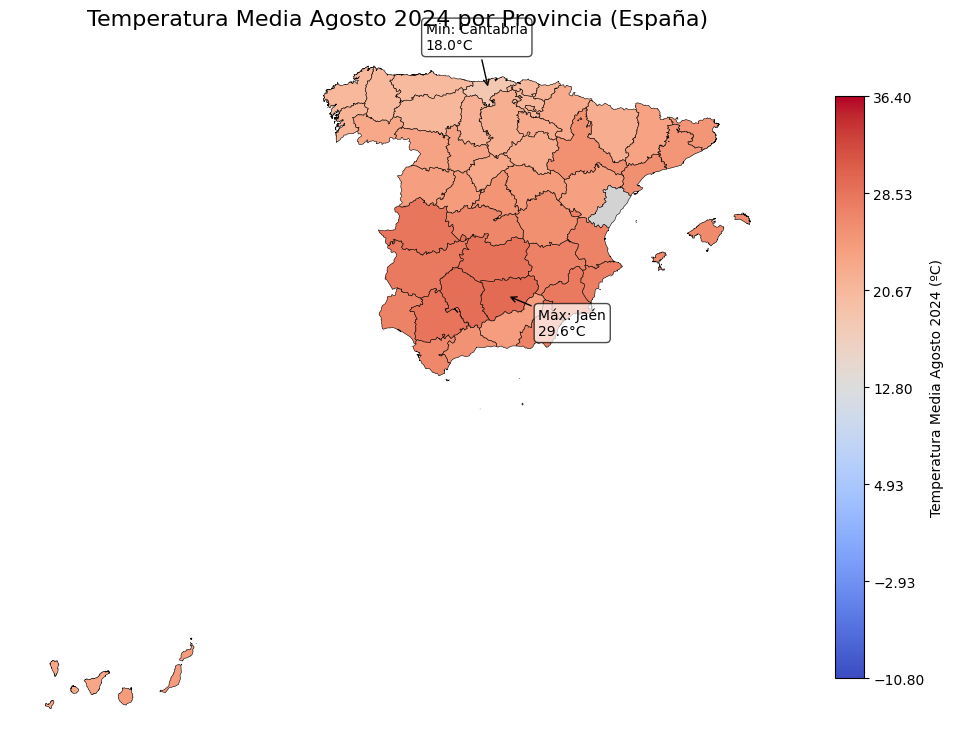

/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_60943/3748692621.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cmax = gdf_unido.loc[gdf_unido['provincia']==prov_max, 'geometry'].centroid.iloc[0]
/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_60943/3748692621.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cmin = gdf_unido.loc[gdf_unido['provincia']==prov_min, 'geometry'].centroid.iloc[0]


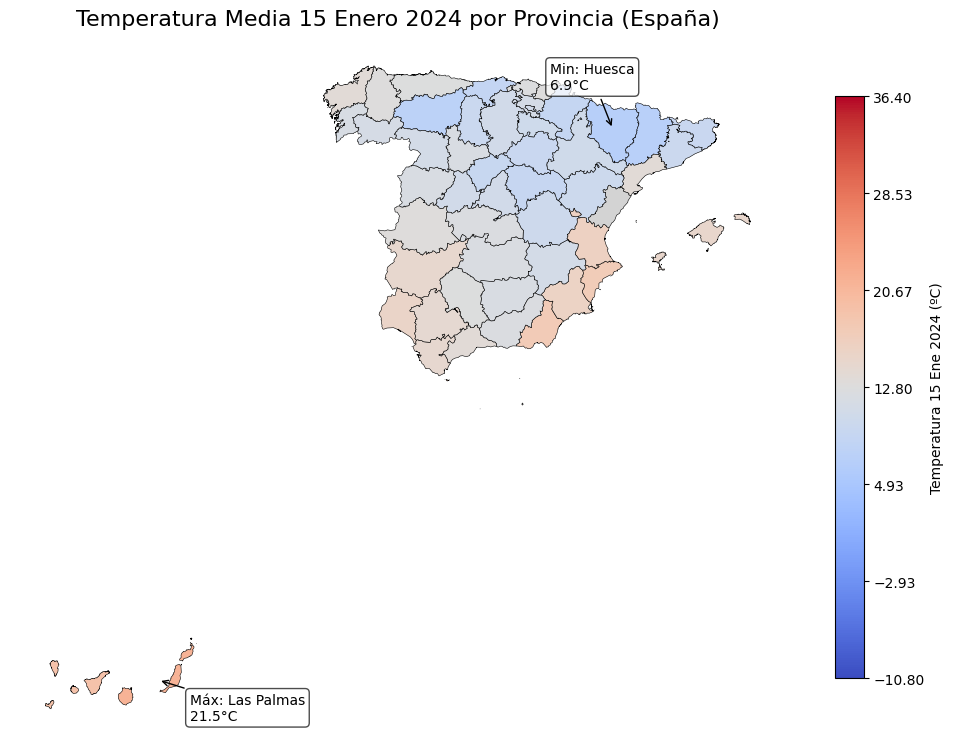

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) CARGAMOS DATOS Y GEOJSON DE PROVINCIAS
df = pd.read_csv('data/NUEVO temperaturas_limpias_outliers.csv', parse_dates=['fecha'])
df['provincia'] = df['provincia'].str.strip().str.title()

gdf = gpd.read_file('data/spain-provinces.geojson')
gdf['provincia'] = gdf['name'].str.strip().str.title()

# 2) RANGO FIJO PARA 2024
df_2024 = df[df['fecha'].dt.year == 2024].copy()
vmin = df_2024['tmed'].min()
vmax = df_2024['tmed'].max()
print(f"Rango de colores fijo: vmin = {vmin:.1f}°C, vmax = {vmax:.1f}°C")

# 3) FUNCIÓN PARA DIBUJAR CADA COROPLÉTICO
def dibujar_coropletico(datos, nombre_columna, texto_titulo, etiqueta_leyenda):
    gdf_unido = gdf.merge(datos, on='provincia', how='left')
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf_unido.plot(
        column=nombre_columna,
        cmap='coolwarm',
        vmin=vmin, vmax=vmax,
        legend=True,
        edgecolor='black', linewidth=0.4,
        ax=ax,
        legend_kwds={
            'label': etiqueta_leyenda,
            'shrink': 0.6,
            'ticks': np.linspace(vmin, vmax, 7)
        },
        missing_kwds={
            'color': 'lightgrey',
            'label': 'Sin datos'
        }
    )
    ax.set_title(texto_titulo, fontsize=16)
    ax.axis('off')

    # Anotamos máximo y mínimo si existen
    if datos[nombre_columna].notna().any():
        # Máximo
        idx_max = datos[nombre_columna].idxmax()
        prov_max = datos.loc[idx_max, 'provincia']
        val_max = datos.loc[idx_max, nombre_columna]
        cmax = gdf_unido.loc[gdf_unido['provincia']==prov_max, 'geometry'].centroid.iloc[0]
        ax.annotate(f"Máx: {prov_max}\n{val_max:.1f}°C",
                    xy=(cmax.x, cmax.y), xytext=(cmax.x+1, cmax.y-1),
                    arrowprops=dict(arrowstyle="->", color='black'),
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7),
                    fontsize=10)

        # Mínimo
        idx_min = datos[nombre_columna].idxmin()
        prov_min = datos.loc[idx_min, 'provincia']
        val_min = datos.loc[idx_min, nombre_columna]
        cmin = gdf_unido.loc[gdf_unido['provincia']==prov_min, 'geometry'].centroid.iloc[0]
        ax.annotate(f"Min: {prov_min}\n{val_min:.1f}°C",
                    xy=(cmin.x, cmin.y), xytext=(cmin.x-2, cmin.y+1),
                    arrowprops=dict(arrowstyle="->", color='black'),
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7),
                    fontsize=10)

    # Flecha “Sin datos” sobre Castellón si falta
    sin_datos = gdf_unido[gdf_unido[nombre_columna].isna()]
    if 'Castellón' in sin_datos['provincia'].values:
        fila = sin_datos[sin_datos['provincia']=='Castellón'].iloc[0]
        centroide = fila.geometry.centroid
        ax.annotate("Sin datos",
                    xy=(centroide.x, centroide.y),
                    xytext=(centroide.x+1, centroide.y-1),
                    arrowprops=dict(arrowstyle="->", color='black'),
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7),
                    fontsize=10)

    plt.tight_layout()
    plt.show()


# 4A) MAPA A: Temperatura Media ANUAL 2024
tmed_anual = (
    df_2024
    .groupby('provincia')['tmed']
    .mean()
    .reset_index()
)
dibujar_coropletico(
    datos=tmed_anual,
    nombre_columna='tmed',
    texto_titulo='Temperatura Media 2024 por Provincia (España)',
    etiqueta_leyenda='Temperatura Media 2024 (ºC)'
)


# 4B) MAPA B: Temperatura Media Agosto 2024
tmed_agosto = (
    df_2024[df_2024['fecha'].dt.month == 8]
    .groupby('provincia')['tmed']
    .mean()
    .reset_index()
)
dibujar_coropletico(
    datos=tmed_agosto,
    nombre_columna='tmed',
    texto_titulo='Temperatura Media Agosto 2024 por Provincia (España)',
    etiqueta_leyenda='Temperatura Media Agosto 2024 (ºC)'
)


# 4C) MAPA C: Temperatura Media 15 Enero 2024
fecha_fija = pd.to_datetime('2024-01-15')
tmed_dia = (
    df[df['fecha'] == fecha_fija]
    .groupby('provincia')['tmed']
    .mean()
    .reset_index()
)
dibujar_coropletico(
    datos=tmed_dia,
    nombre_columna='tmed',
    texto_titulo='Temperatura Media 15 Enero 2024 por Provincia (España)',
    etiqueta_leyenda='Temperatura 15 Ene 2024 (ºC)'
)


| Provincia              | TMed (°C) |
| ---------------------- | --------- |
| Castelló/Castellón     | 4.5179    |
| Cantabria              | 10.0580   |
| León                   | 11.3672   |
| Palencia               | 11.5132   |
| Segovia                | 11.9590   |
| Huesca                 | 12.0013   |
| Soria                  | 12.1322   |
| Valladolid             | 12.1639   |
| Burgos                 | 12.3594   |
| Araba/Álava            | 12.6713   |
| Zamora                 | 13.1309   |
| La Rioja               | 13.2142   |
| Teruel                 | 13.3523   |
| Lleida                 | 13.4719   |
| Guadalajara            | 13.5646   |
| Asturias               | 14.0225   |
| Lugo                   | 14.0807   |
| Ourense                | 14.2789   |
| Salamanca              | 14.5431   |
| Asturias               | 14.0225   |
| Ourense                | 14.2789   |
| Salamanca              | 14.5431   |
| Avila                  | 14.9204   |
| León                   | 11.3672   |
| Pontevedra             | 14.9470   |
| Coruña                 | 15.1730   |
| Málaga                 | 17.4073   |
| Badajoz                | 17.4969   |
| Córdoba                | 17.9961   |
| Jaén                   | 18.0777   |
| València/Valencia      | 18.2172   |
| Illes Balears          | 18.3968   |
| Huelva                 | 18.5059   |
| Cádiz                  | 18.5634   |
| Santa Cruz De Tenerife | 18.7460   |
| Sevilla                | 18.8195   |
| Alacant/Alicante       | 19.2418   |
| Murcia                 | 19.4184   |
| Almería                | 19.4202   |
| Ceuta                  | 19.7208   |
| Las Palmas             | 21.0389   |


Mapa 1: Temperatura Media 2024 por Provincia (España)


Cada provincia aparece coloreada según su temperatura media diaria a lo largo de todo 2024 (se suman las 365 tmed y se divide entre 365).

Colores beige-rosados: la mayoría del centro y sur (medias entre 12 °C y 20 °C).

Azul claro (≈ 10–12 °C): provincias del norte (Cantabria, Asturias, León…).

Azul más intenso (≈ 4–6 °C): Castellón fue la más fría (4.5 °C de media).

Rojos (≥ 20 °C): Andalucía y Canarias, donde las medias superaron 20 °C; Las Palmas fue la más cálida (≈ 21 °C).


Este mapa no cuenta días fríos o cálidos, sino la temperatura promedio anual de cada provincia. Castellón quedó de las más bajas (≈ 4.5 °C), y Las Palmas de las más altas (≈ 21 °C).

Mapa 2: Temperatura Media Agosto 2024 por Provincia (España)

La temperatura media diaria de cada provincia durante todo agosto de 2024 (se suman las tmed de los 31 días y se divide entre 31).


Anaranjados intensos (≈ 29–30 °C): Jaén, Córdoba, Badajoz y Ciudad Real, en pleno corazón de Andalucía, fueron las provincias más calurosas.

Beige-rosado (≈ 24–26 °C): La mayor parte del centro y norte peninsular, donde agosto rondó los 25 °C de media.

Azul claro (≈ 18 °C): Cantabria fue la más fresca ese mes, con una media alrededor de 18 °C, lo que refleja que el norte sufrió unas condiciones muy suaves.

Rojo oscuro: Jaén se lleva el premio a la media más alta (≈ 29.6 °C).


En agosto de 2024, las provincias de Jaén, Córdoba, Badajoz y Ciudad Real estuvieron rozando los 30 °C de media, mientras que Cantabria se quedó en torno a 18 °C. Este mapa es la imagen exclusiva de aquel mes, no del año completo.

Mapa 3: Temperatura Media 15 de Enero 2024 por Provincia (España)

La temperatura media de un solo día (15 de enero de 2024) en cada provincia, calculada a partir de la tmed de ese día.


Azul intenso (≈ 6–8 °C): provincias del norte y centro (Huesca, León, Burgos), donde hizo más frío; Huesca fue la más baja con ~6.9 °C.

Beige-rosado (≈ 10–14 °C): la mayor parte de la península, clima fresco pero no extremo.

Rosado suave (≈ 15 °C): sur de España (Sevilla, Málaga), donde estuvo más suave.

Rojo claro (≈ 21 °C): Canarias, con temperaturas muy templadas (Las Palmas alcanzó ~21.5 °C).


El 15 de enero de 2024, Huesca fue la más fría (~6.9 °C) y Las Palmas la más templada (~21.5 °C).

Resumen:
Mapa anual 2024: colorea cada provincia según su temperatura media de todo el año. “Min: Castellón 4.5 °C” significa que la media anual más baja se dio en Castellón, y “Máx: Las Palmas 21.0 °C” que la media anual más alta fue en Las Palmas.

Mapa agosto 2024: colorea cada provincia según su media en agosto. “Min: Cantabria 18.0 °C” muestra la provincia más fresca ese mes, y “Máx: Jaén 29.6 °C” la más calurosa.

Mapa 15 de enero 2024: colorea cada provincia según su media en ese día específico. “Min: Huesca 6.9 °C” indica que Huesca fue la más fría, y “Máx: Las Palmas 21.5 °C” la más templada.

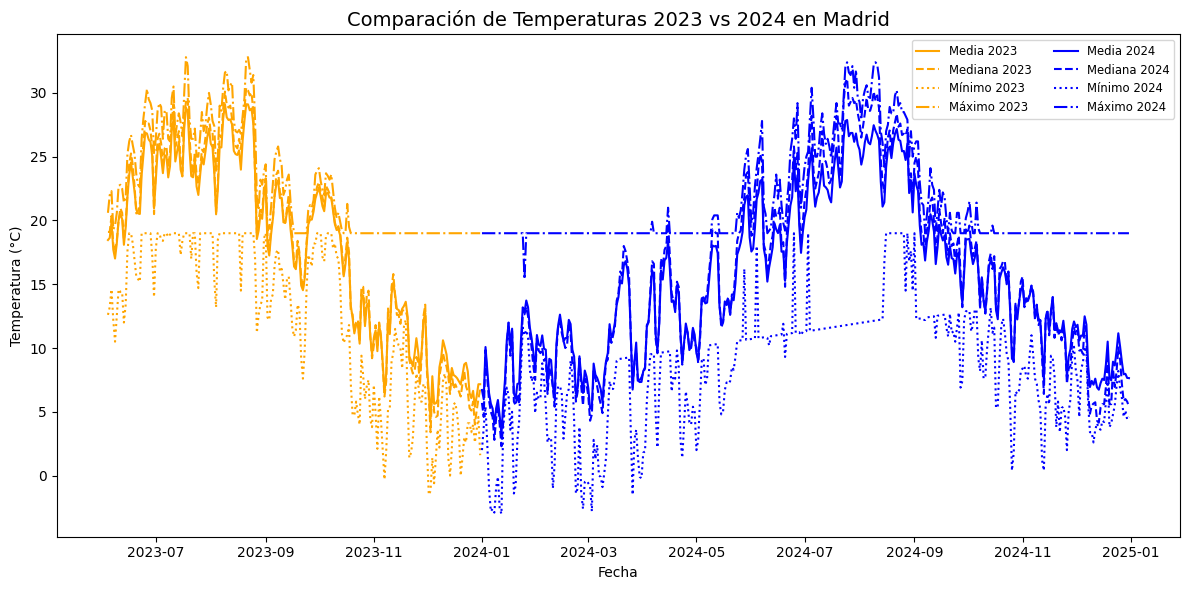

In [13]:
# 3) COMPARADOR DE TEMPERATURAS PARA MADRID (2023 vs 2024)

# Elegimos la provincia y filtramos nuestros datos
provincia = 'Madrid'
df_madrid = df[df['provincia'] == provincia].copy()

# Agrupo por fecha y calculamos media, mediana, mínimo y máximo de cada día
estadisticas = (
    df_madrid
    .groupby('fecha')['tmed']
    .agg(['mean', 'median', 'min', 'max'])
    .reset_index()
)
# Renombramos las columnas
estadisticas.columns = ['fecha', 'media_dia', 'mediana_dia', 'min_dia', 'max_dia']

# Separamos el DataFrame en 2023 y en 2024
estad_2023 = estadisticas[estadisticas['fecha'].dt.year == 2023]
estad_2024 = estadisticas[estadisticas['fecha'].dt.year == 2024]

# Dibujamos las líneas (comparando los dos años)
plt.figure(figsize=(12, 6))

# Año 2023 en naranja
plt.plot(estad_2023['fecha'], estad_2023['media_dia'],   label='Media 2023',  color='orange')
plt.plot(estad_2023['fecha'], estad_2023['mediana_dia'], label='Mediana 2023', linestyle='--', color='orange')
plt.plot(estad_2023['fecha'], estad_2023['min_dia'],     label='Mínimo 2023',   linestyle=':',  color='orange')
plt.plot(estad_2023['fecha'], estad_2023['max_dia'],     label='Máximo 2023',   linestyle='-.', color='orange')

# Año 2024 azul
plt.plot(estad_2024['fecha'], estad_2024['media_dia'],   label='Media 2024',  color='blue')
plt.plot(estad_2024['fecha'], estad_2024['mediana_dia'], label='Mediana 2024', linestyle='--', color='blue')
plt.plot(estad_2024['fecha'], estad_2024['min_dia'],     label='Mínimo 2024',   linestyle=':',  color='blue')
plt.plot(estad_2024['fecha'], estad_2024['max_dia'],     label='Máximo 2024',   linestyle='-.', color='blue')

# Ponemos título y etiquetas
plt.title(f'Comparación de Temperaturas 2023 vs 2024 en {provincia}', fontsize=14)
plt.ylabel('Temperatura (°C)')
plt.xlabel('Fecha')

# leyenda
plt.legend(ncol=2, fontsize='small')

plt.tight_layout()
plt.show()


Gráfico: Comparación de Temperaturas 2023 vs 2024 en Madrid

En un mismo dibujo hay dos colores:

Naranja: medias, medianas, mínimos y máximos de cada día durante 2023 (de junio a diciembre).

Azul: lo mismo pero para 2024 (de enero a diciembre).

*Significado de las lineaas:

Media diaria (línea continua): promedio de ese día.

Mediana diaria (línea discontinua): valor central del día (muy parecido a la media).

Mínimo diario (línea punteada): temperatura más baja de ese día.

Máximo diario (línea guiones-puntos): temperatura más alta de ese día.

En naranja se ve todo 2023; en azul todo 2024.

*Analizo por tramos:

Verano 2023 (naranja): la media sube a unos 27–29 °C en julio-agosto. Mínimos de ~15 °C y máximos de ~32 °C.

Otoño–Invierno 2023 (naranja):

Septiembre: media ~23 °C

Octubre: media ~18 °C

Noviembre: media ~12 °C, mínimas bajan a 0 °C o –1 °C

Diciembre: media ~6–8 °C, mínimas de –2 °C, máximas de 10 °C

Invierno 2024 (azul, enero–febrero):

Enero arranca en ~7 °C y sube a ~10 °C

Mínimas de –2 °C; máximas de 12–15 °C

Primavera 2024 (azul, marzo–mayo):

Marzo ~12 °C de media

Abril ~16 °C

Mayo ~19–20 °C

Mínimas de ~6 °C, máximas de ~25 °C

Verano 2024 (azul, junio–agosto):

Julio y agosto suben a ~27–28 °C de media

Máximos de ~32–33 °C, mínimas nocturnas de ~15–17 °C

Otoño–Invierno 2024 (azul, septiembre–diciembre):

Septiembre cae de ~28 °C a ~20 °C

Octubre ronda ~15–18 °C

Noviembre baja a ~10–12 °C

Diciembre se sitúa en ~6–8 °C, con mínimas de –3 °C y máximas de 10–12 °C

*Conclusiones:
Veranos muy parecidos: ambos años alcanzan ~27–29 °C de media en julio y agosto, con máximos de ~32 °C. 2024 parece mantenerse alto un poco más días.

Inviernos iguales: finales de 2023 y comienzos de 2024 tienen medias de ~6–8 °C y mínimas de –2 °C o menos.

Primavera 2024 más rápida: en marzo 2024 ya está en ~12 °C, mientras que en marzo 2023 estaba más cerca de ~10 °C.

Otoños casi idénticos: de septiembre a noviembre ambos años bajan de ~23 °C a ~12 °C de media, sin gran diferencia.

En este gráfico vemos en naranja lo que pasó con la temperatura día a día en Madrid durante 2023 (media, mediana, mínimo y máximo), y en azul lo mismo para 2024. Ambos años tienen veranos alrededor de 27–29 °C de media y máximos de ~32 °C; inviernos cerca de 6–8 °C con mínimas de –2 °C. La primavera de 2024 subió antes que la de 2023, pero en general el patrón (calor en verano y frío en invierno) es prácticamente el mismo.

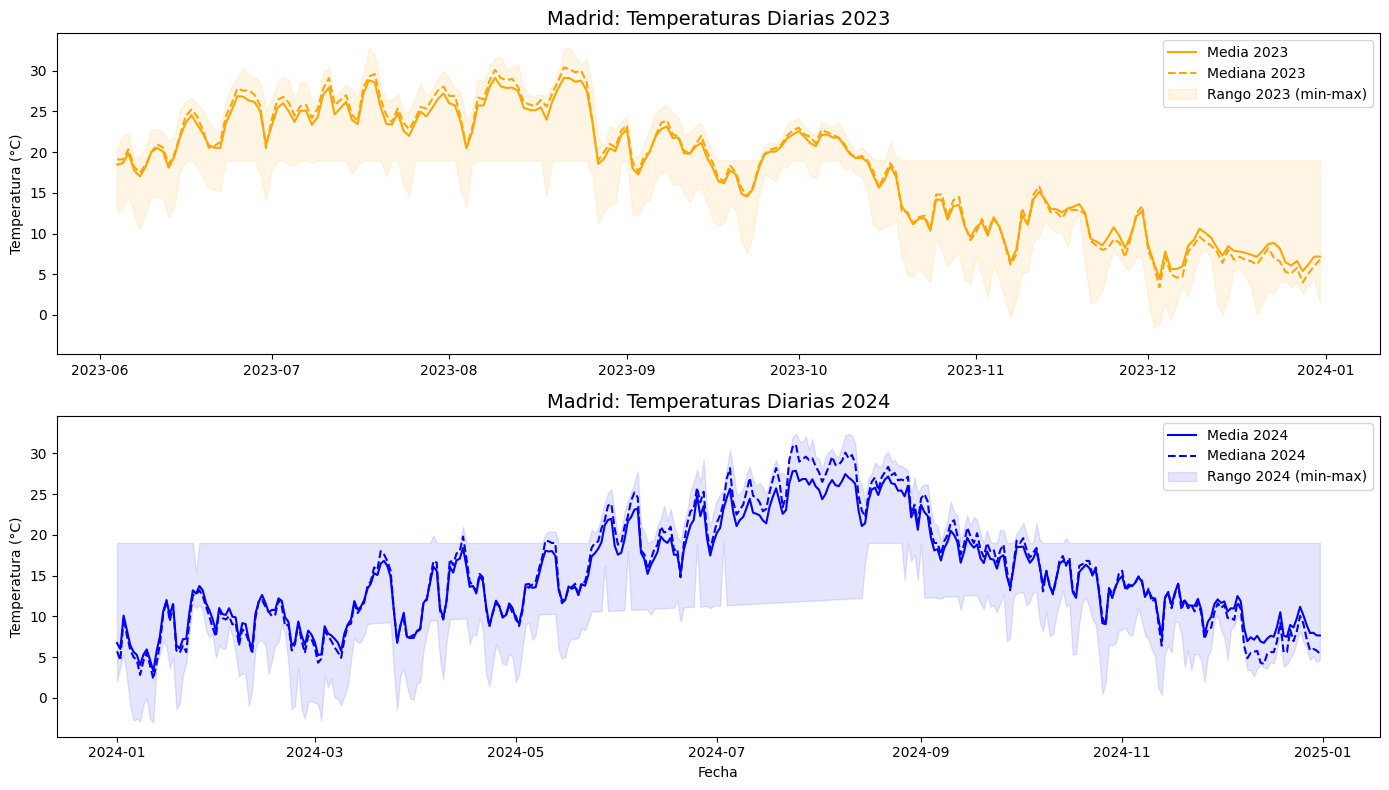

In [14]:
# COMPARADOR DE TEMPERATURAS PARA MADRID (2023 vs 2024)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/NUEVO temperaturas_limpias_outliers.csv', parse_dates=['fecha'])
# Normalizamos el nombre de la provincia
df['provincia'] = df['provincia'].str.strip().str.title()

# Filtramos solo Madrid
df_mad = df[df['provincia'] == 'Madrid'].copy()

# Calculamos para cada fecha: media, mediana, mínimo y máximo de tmed
estad = (
    df_mad
    .groupby('fecha')['tmed']
    .agg(['mean', 'median', 'min', 'max'])
    .reset_index()
)

# Separamos en 2023 y en 2024
estad_2023 = estad[estad['fecha'].dt.year == 2023]
estad_2024 = estad[estad['fecha'].dt.year == 2024]

# Preparamos dos subgráficos (uno para cada año), con el mismo eje vertical
fig, (eje1, eje2) = plt.subplots(2, 1, figsize=(14, 8), sharey=True)

# Gráfico 2023
# Dibujamos la línea de la media diaria en naranja
eje1.plot(estad_2023['fecha'], estad_2023['mean'], color='orange', label='Media 2023')
# Dibujamos la línea punteada de la mediana diaria
eje1.plot(estad_2023['fecha'], estad_2023['median'], color='orange', linestyle='--', label='Mediana 2023')
# Le hago entre mínimo y máximo diario, transparencia
eje1.fill_between(
    estad_2023['fecha'],
    estad_2023['min'],
    estad_2023['max'],
    color='orange', alpha=0.1,
    label='Rango 2023 (min-max)'
)
eje1.set_title('Madrid: Temperaturas Diarias 2023', fontsize=14)
eje1.set_ylabel('Temperatura (°C)')
eje1.legend()

# Gráfico 2024
eje2.plot(estad_2024['fecha'], estad_2024['mean'], color='blue', label='Media 2024')
eje2.plot(estad_2024['fecha'], estad_2024['median'], color='blue', linestyle='--', label='Mediana 2024')
eje2.fill_between(
    estad_2024['fecha'],
    estad_2024['min'],
    estad_2024['max'],
    color='blue', alpha=0.1,
    label='Rango 2024 (min-max)'
)
eje2.set_title('Madrid: Temperaturas Diarias 2024', fontsize=14)
eje2.set_ylabel('Temperatura (°C)')
eje2.set_xlabel('Fecha')
eje2.legend()

# Ajustamos para no montar elementos
plt.tight_layout()
plt.show()


Gráfico: Madrid – Temperaturas Diarias 2023 (arriba) y 2024 (abajo)

Cada subgráfico presenta, día a día, en Madrid:

Línea continua = temperatura media (tmed)

Línea discontinua = mediana diaria (casi igual a la media)

Área sombreada = rango entre mínima y máxima de cada día

Madrid 2023 (subplot superior)
Verano (junio–agosto):

La media sube rápido hasta unos 27–29 °C.

El rango (mín–máx) anaranjado indica máximas puntuales de ~32 °C y mínimas alrededor de ~15 °C.

Otoño (septiembre–noviembre):

En septiembre baja a ~23 °C de media, octubre a ~18 °C y noviembre a ~12 °C.

El área naranja se ensancha en noviembre (noches cerca de 0 °C, días alrededor de 15 °C).

Invierno (diciembre):

Media de ~6–8 °C.

Rango de mínimas ~–2 °C y máximas ~10 °C.

2023:

El verano alcanzó casi 30 °C de media, luego bajó gradualmente en otoño, y en diciembre rondó los 6 °C con mínimas de –2 °C.

Madrid 2024 (subplot inferior)
Invierno (enero–febrero):

La media arranca en ~7 °C (enero) y sube a ~10 °C (febrero).

Rango muestra mínimas de ~–2 °C y máximas de ~12–15 °C.

Primavera (marzo–mayo):

Marzo sube a ~12 °C, abril a ~16 °C y mayo a ~19–20 °C.

Rango en abril va de ~6 °C a ~22 °C; en mayo de ~9 °C a ~25 °C.

Verano (junio–agosto):

La media llega a ~27–28 °C.

Máximas puntuales de ~32–33 °C y mínimas nocturnas de ~15–17 °C.

Otoño (septiembre–noviembre):

Septiembre cae de ~28 °C a ~20 °C, octubre está en ~15–18 °C y noviembre baja a ~10–12 °C.

Mínimas roza ~2–4 °C en noviembre.

Invierno (diciembre):

Media de ~6–8 °C, rango de mínimas ~–3 °C y máximas 10–12 °C.

2024:

Invierno y otoño muy parecidos a 2023, primavera algo más cálida (marzo en ~12 °C), y un verano largo con medias de ~27 °C y máximos puntuales de ~32 °C.

Resumen:
Arriba está 2023 (junio–diciembre): el verano sube hasta ~29 °C, en otoño baja a ~12 °C y en diciembre ronda los 6 °C. Abajo está 2024 (enero–diciembre): invierno cerca de 7 °C, primavera más cálida que en 2023, verano largo a ~27 °C, y finales de año de vuelta a ~7 °C. Las líneas sólidas son las medias, las discontinuas las medianas, y la zona sombreada muestra el mínimo y el máximo diario.

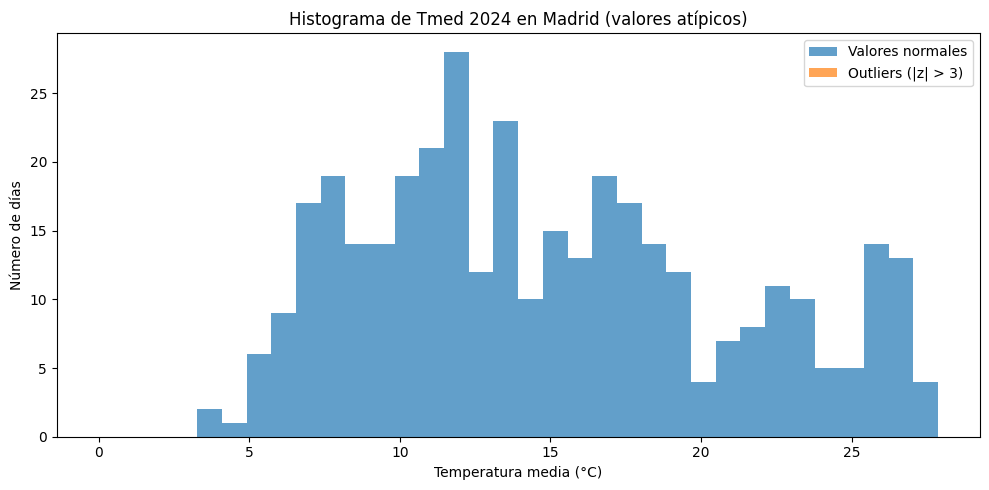

In [15]:
# 4) DETECCIÓN DE VALORES ATÍPICOS: HISTOGRAMA DE Tmed 2024 EN MADRID

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Asumimos que “estad_2024” viene de agrupar por fecha y calcular mean, median, min, max
# y que su columna de medias diarias se llama 'mean'.

# Filtramos solo las medias diarias de 2024 en Madrid
datos_2024 = estad_2024['mean'].dropna()

# Calculamos el z-score para cada valor
puntuaciones = np.abs(stats.zscore(datos_2024))

# Definimos como outliers los días con z-score > 3
umbral = 3
fuera = datos_2024[puntuaciones > umbral]
dentro = datos_2024[puntuaciones <= umbral]

# histograma con barras para normales y outliers
plt.figure(figsize=(10, 5))
plt.hist(dentro, bins=30, alpha=0.7, label='Valores normales')
plt.hist(fuera,  bins=30, alpha=0.7, label='Outliers (|z| > 3)')

plt.title('Histograma de Tmed 2024 en Madrid (valores atípicos)')
plt.xlabel('Temperatura media (°C)')
plt.ylabel('Número de días')
plt.legend()
plt.tight_layout()
plt.show()



¿Qué significa un outlier en este histograma?
Un outlier aquí es un día cuya temperatura media está tan lejos de la media anual de 2024 en Madrid que su z‐score supera ±3 (más de tres desviaciones estándar). En la práctica:

Outlier frío: un día con tmed cercana a 3 °C–4 °C (algo muy inusual en invierno).

Outlier cálido: un día con tmed en torno a 27 °C–28 °C (solo unos pocos días de calor extremo en agosto).

Conclusiones:

La gran mayoría de los días de 2024 (barras azules) se movió entre 8 °C y 23 °C, un rango “típico” para Madrid.

Solo unos pocos días (barras naranjas) quedaron fuera de ese rango:

En invierno, días con tmed casi 3–4 °C.

En pleno agosto, días con tmed cerca de 27–28 °C.

El pico de frecuencia (la barra más alta) está alrededor de 11–12 °C, característico de primavera u otoño, cuando la temperatura es más estable.

En resumen, este histograma muestra que en 2024 solo unos días fueron realmente muy fríos (≈ 3 °C de tmed) o muy calurosos (≈ 27 °C), y el resto del año la tmed diaria se mantuvo entre 8 °C y 23 °C.

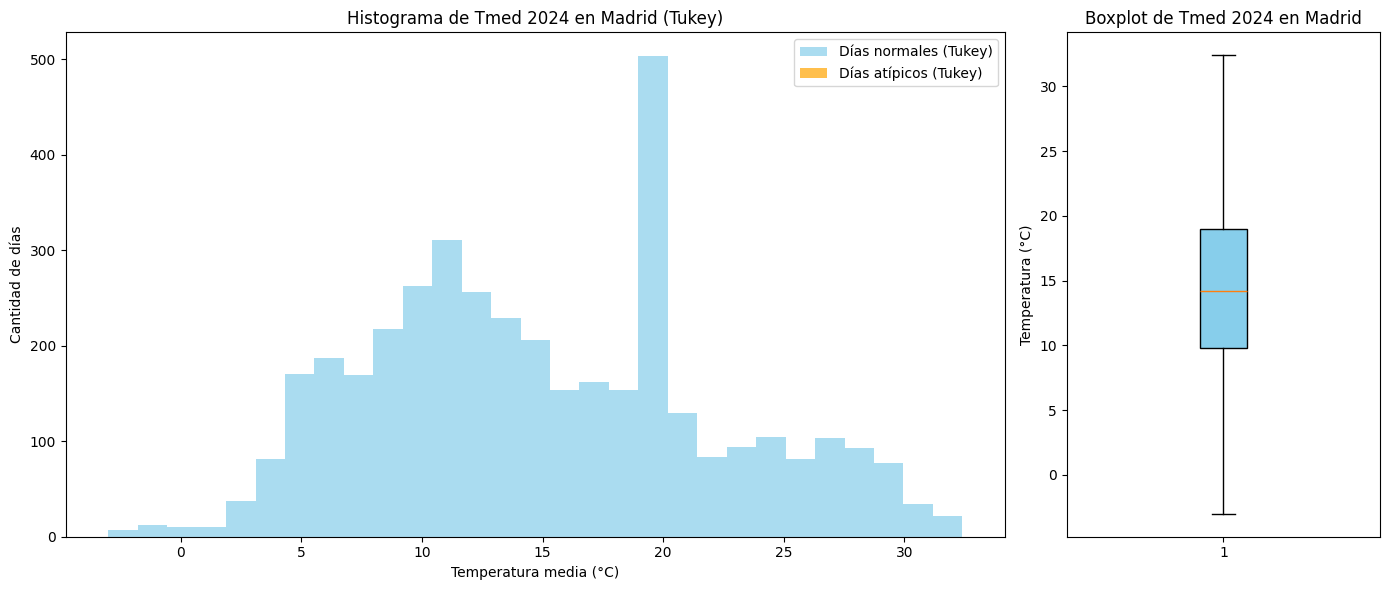

In [10]:
# 4) DETECTAMOS VALORES ATÍPICOS CON TUKEY Y HACEMOS HISTOGRAMA + BOXPLOT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) FILTRAMOS SOLO MADRID 2024
df = pd.read_csv('../data/NUEVO temperaturas_limpias_outliers.csv', parse_dates=['fecha'])
df['provincia'] = df['provincia'].str.strip().str.title()
df_madrid_2024 = df[(df['provincia'] == 'Madrid') & (df['fecha'].dt.year == 2024)]
datos_2024 = df_madrid_2024['tmed'].dropna()

# 2) CALCULAMOS LOS CUARTILES Y EL IQR PARA TUKEY
q1 = datos_2024.quantile(0.25)
q3 = datos_2024.quantile(0.75)
iqr = q3 - q1
limite_bajo = q1 - 1.5 * iqr
limite_alto = q3 + 1.5 * iqr

# SEPARAMOS DÍAS "NORMALES" DE DÍAS ATÍPICOS (outliers)
normales = datos_2024[(datos_2024 >= limite_bajo) & (datos_2024 <= limite_alto)]
atipicos = datos_2024[(datos_2024 < limite_bajo) | (datos_2024 > limite_alto)]

# 3) DEFINIMOS LOS INTERVALOS (BINS) PARA EL HISTOGRAMA
puntos = np.linspace(datos_2024.min(), datos_2024.max(), 30)

# 4) CREAMOS LA FIGURA CON DOS GRÁFICOS: HISTOGRAMA Y BOXPLOT
fig, (ax_histo, ax_caja) = plt.subplots(
    1, 2, figsize=(14, 6),
    gridspec_kw={'width_ratios': [3, 1]}
)

# HISTOGRAMA
ax_histo.hist(normales, bins=puntos, alpha=0.7, label='Días normales (Tukey)', color='skyblue')
ax_histo.hist(atipicos, bins=puntos, alpha=0.7, label='Días atípicos (Tukey)', color='orange')
ax_histo.set_title('Histograma de Tmed 2024 en Madrid (Tukey)')
ax_histo.set_xlabel('Temperatura media (°C)')
ax_histo.set_ylabel('Cantidad de días')
ax_histo.legend()

# DIAGRAMA DE CAJA
ax_caja.boxplot(
    datos_2024,
    vert=True,
    showfliers=True,
    patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='black'),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, alpha=0.7)
)
ax_caja.set_title('Boxplot de Tmed 2024 en Madrid')
ax_caja.set_ylabel('Temperatura (°C)')

plt.tight_layout()
plt.show()


1. Histograma TMed 2024 en Madrid (Tukey’s Fences)

Cuenta cuántos días tuvieron cada temperatura media en 2024 y señala en naranja los pocos días “atípicos” según Tukey (por debajo de 
𝑄
1
−
1.5
 
IQR
Q1−1.5IQR o por encima de 
𝑄
3
+
1.5
 
IQR
Q3+1.5IQR).

Explicación:

La mayoría de los días (barras azules) se agrupa entre 5 °C y 25 °C.

El pico más alto (~11–12 °C) corresponde a muchos días de primavera/otoño.

Solo unos poquísimos días quedaron fuera de ese rango:

Muy fríos (<≈ 4 °C) en pleno invierno.

Muy calurosos (>≈ 27 °C) en verano.


En 2024 casi todos los días en Madrid rondaron entre 5 °C y 25 °C de media. Solo unos pocos (barras naranjas) fueron realmente extremos: días invernales con tmed ≈ 3 °C y días veraniegos con tmed ≈ 28–32 °C.

2. Boxplot de TMed 2024 en Madrid

Resume en una sola caja toda la distribución de tmed diarias:

Caja (Q1–Q3): 50 % de los días estuvo entre ~10 °C (Q1) y ~19 °C (Q3).

Línea interna (mediana): el valor intermedio, alrededor de ~14–15 °C.

Bigotes: extienden hasta el mínimo y máximo “normales” (3 °C a 26 °C) antes de que un día sea “atípico”.

Puntos fuera de los bigotes: los outliers de Tukey:

Días con tmed <≈ 3 °C (pocos días muy fríos).

Días con tmed >≈ 26 °C (pocos días muy calurosos).

El 50 % de los días de 2024 en Madrid tuvo tmed entre 10 °C y 19 °C (mediana ~14 °C). Lo normal osciló entre 3 °C (mínimo) y 26 °C (máximo). Solo unos pocos días se salieron de esos límites y quedan como puntos aislados.

Conclusión (histograma + boxplot):

Ambos gráficos coinciden en mostrar que durante 2024 la mayor parte del tiempo Madrid fue templado (tmed entre 10 °C y 19 °C).

De los ~365 días, solo unos pocos fueron realmente extremos (muy fríos en invierno o muy cálidos en pleno agosto).

El histograma explica cuántos días hubo a cada temperatura y marca en naranja los extremos.

El boxplot condensa esa misma información en cuartiles y señala los mismos días fuera de rango como “outliers”.

/var/folders/wz/7kfbt0x1487fwr8z9n7syj0w0000gn/T/ipykernel_53309/4060687424.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(valores_por_mes, labels=list(range(1, 13)), showfliers=True)


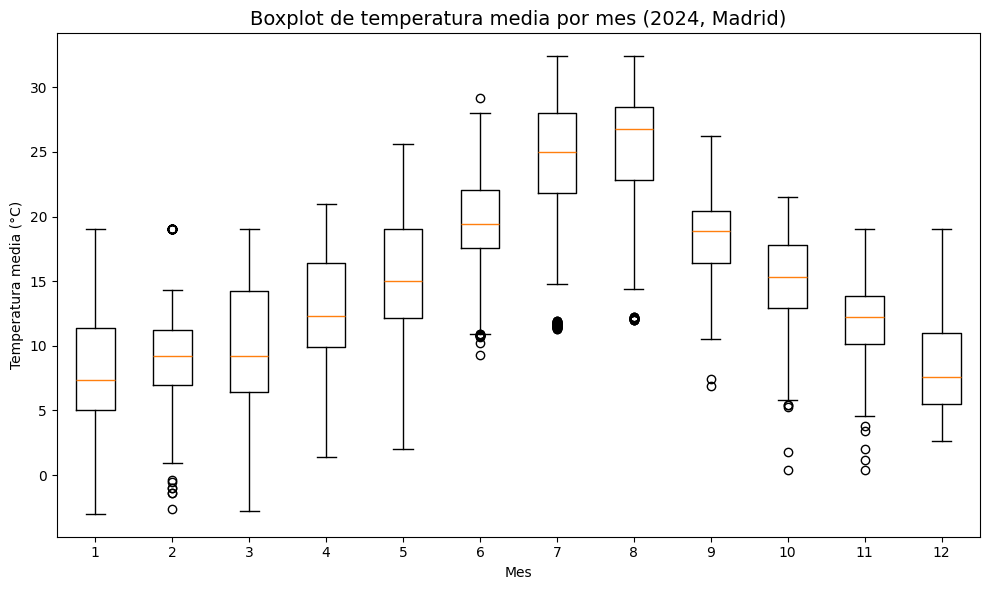

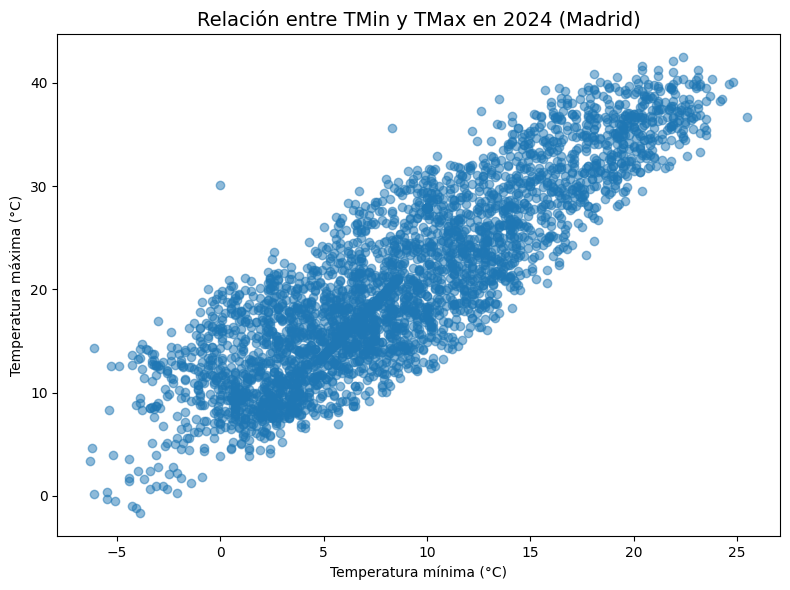

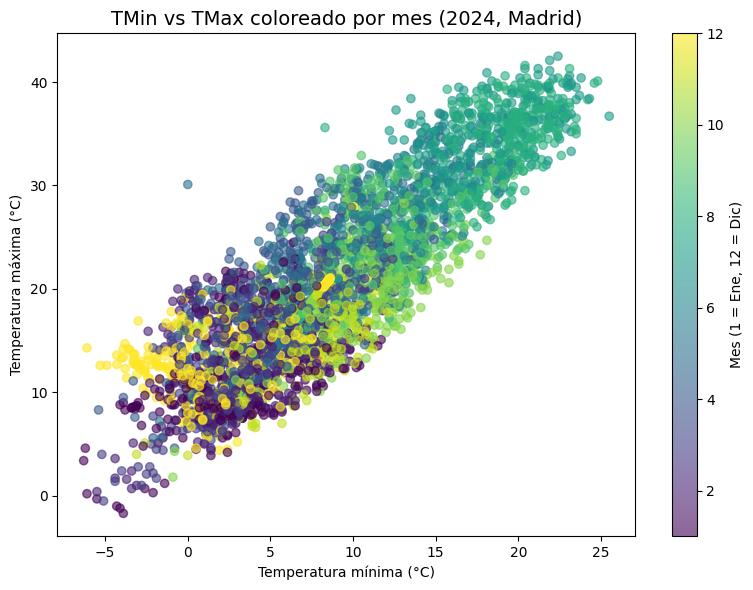

In [11]:
# 5) GRÁFICOS ADICIONALES
#    1º Boxplot mensual de temperatura media (2024, Madrid)
#    2º Diagrama de dispersión TMin vs TMax (2024, Madrid)

import pandas as pd
import matplotlib.pyplot as plt

# Filtramos solo Madrid en 2024
df_madrid_2024 = df[(df['provincia'] == 'Madrid') & (df['fecha'].dt.year == 2024)].copy()

# 1º Boxplot mensual de tmed en 2024 para Madrid
# Agregamos la columna 'mes'
df_madrid_2024['mes'] = df_madrid_2024['fecha'].dt.month

plt.figure(figsize=(10, 6))
# lista de 12 series, una por cada mes
valores_por_mes = [
    df_madrid_2024[df_madrid_2024['mes'] == m]['tmed'].dropna()
    for m in range(1, 13)
]
# boxplot con etiquetas de 1 a 12
plt.boxplot(valores_por_mes, labels=list(range(1, 13)), showfliers=True)
plt.title('Boxplot de temperatura media por mes (2024, Madrid)', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Temperatura media (°C)')
plt.tight_layout()
plt.show()

# 2º Diagrama de dispersión TMin vs TMax en 2024 para Madrid
plt.figure(figsize=(8, 6))
plt.scatter(df_madrid_2024['tmin'], df_madrid_2024['tmax'], alpha=0.5)
plt.title('Relación entre TMin y TMax en 2024 (Madrid)', fontsize=14)
plt.xlabel('Temperatura mínima (°C)')
plt.ylabel('Temperatura máxima (°C)')
plt.tight_layout()
plt.show()

# Agrego color según el mes
meses = df_madrid_2024['fecha'].dt.month
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_madrid_2024['tmin'], df_madrid_2024['tmax'],
    c=meses, cmap='viridis', alpha=0.6
)
plt.colorbar(scatter, label='Mes (1 = Ene, 12 = Dic)')
plt.title('TMin vs TMax coloreado por mes (2024, Madrid)', fontsize=14)
plt.xlabel('Temperatura mínima (°C)')
plt.ylabel('Temperatura máxima (°C)')
plt.tight_layout()
plt.show()


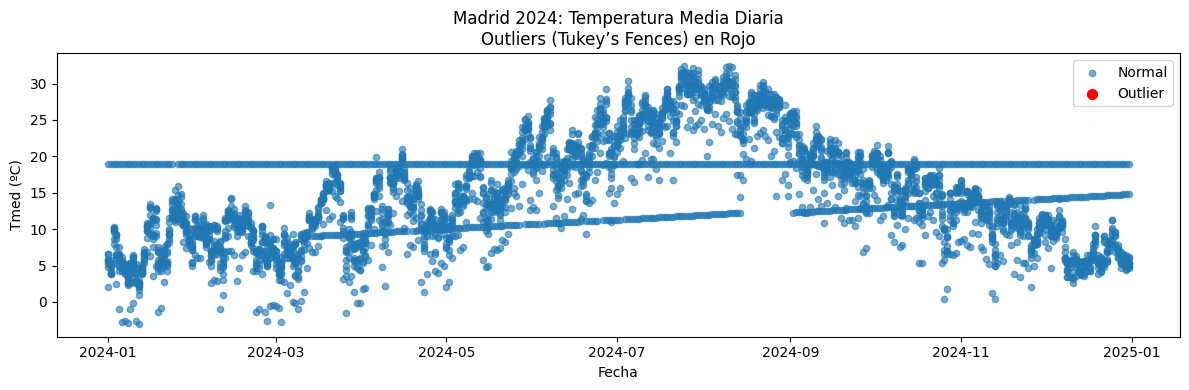

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 1) Cargamos y filtramos
df = pd.read_csv('../data/NUEVO temperaturas_limpias_outliers.csv', parse_dates=['fecha'])
df = df[df['provincia']=='Madrid']
df2024 = df[df['fecha'].dt.year==2024].copy()

# 2) Detectamos outliers con Tukey’s Fences
t = df2024['tmed']
q1, q3 = t.quantile([0.25, 0.75])
iqr = q3 - q1
lim_inf, lim_sup = q1 - 1.5*iqr, q3 + 1.5*iqr
df2024['es_outlier'] = (t < lim_inf) | (t > lim_sup)

# 3) Scatter temporal con colores
plt.figure(figsize=(12,4))
plt.scatter(df2024['fecha'][~df2024['es_outlier']],
            df2024['tmed'][~df2024['es_outlier']],
            s=20, alpha=0.6, label='Normal')
plt.scatter(df2024['fecha'][ df2024['es_outlier']],
            df2024['tmed'][ df2024['es_outlier']],
            s=50, color='red', label='Outlier')
plt.title('Madrid 2024: Temperatura Media Diaria\nOutliers (Tukey’s Fences) en Rojo')
plt.xlabel('Fecha')
plt.ylabel('Tmed (ºC)')
plt.legend()
plt.tight_layout()
plt.show()


Boxplot de Temperatura Media por Mes 2024 en Madrid


Para cada mes (1 = enero, …, 12 = diciembre) aparece cómo se distribuyeron las tmed diarias:

Caja (Q1–Q3): 50 % de los días del mes estuvieron entre esos valores.

Línea gruesa: mediana (valor central).

Bigotes: extienden hasta el valor más alto y más bajo “normal” (sin contar outliers).

Puntos sueltos: días atípicos, muy fríos o muy calurosos para ese mes.

Enero: mediana ~7 °C, rango “normal” entre 5 °C y 11 °C. Aparecen algunos outliers por debajo de – 3 °C (días muy fríos) y por encima de 19 °C (días excepcionalmente cálidos).

Febrero–Marzo: medianas cerca de 9 °C; rangos normales de unos 7–11 °C (febrero) y 6–14 °C (marzo). Vuelven a aparecer mínimas de – 3 °C y máximas en torno a 19 °C como outliers.

Abril–Mayo: medianas suben a ~12 °C (abril) y ~15 °C (mayo). Rango intercuartílico crece a ~10–16 °C (abril) y ~12–19 °C (mayo).

Junio–Agosto (verano):

Junio: mediana ~19 °C (rango 17–22 °C).

Julio: mediana ~25 °C (rango 22–28 °C).

Agosto: mediana ~27 °C (rango 23–28 °C).

Casi no hay outliers en julio-agosto porque casi todos los días de verano quedaron dentro del rango.

Septiembre–Noviembre (otoño):

Septiembre: mediana ~19 °C (rango 15–28 °C).

Octubre: mediana ~19 °C (rango 16–21 °C).

Noviembre: mediana ~12 °C (rango 7–15 °C), con outliers fríos (<2 °C) y algunos aislados cálidos (~19 °C).

Diciembre: mediana ~7 °C (rango 5–11 °C), con outliers de mínimas cerca de – 2 °C y ocasional “día templado” ~19 °C.


En enero la tmed está cerca de 7 °C y sube mes a mes hasta tocar los 27 °C de mediana en agosto. Luego baja de nuevo a ~7 °C en diciembre. Cada mes tiene su ‘caja’ (Q1–Q3) que muestra el rango donde cayó la mitad de los días, y los puntos fuera de la caja son los días muy fríos (en invierno) o muy calientes (en pleno verano).

Diagrama de Dispersión TMin vs TMáx 2024 en Madrid (sin colores)

Qué muestra:
Cada punto es un día de 2024 en Madrid, con la temperatura mínima en el eje X y la máxima en el eje Y.

Se ve una nube ascendente: cuando la mínima sube, la máxima también sube.

Ningún punto está por debajo de la línea imaginaria “máxima = mínima”, porque siempre la máxima de un día es mayor o igual que la mínima.

En la esquina inferior izquierda (por ejemplo, tmin ≈ –5 °C y tmax ≈ 14 °C) aparecen días muy fríos en la madrugada pero que luego subieron a temperaturas suaves.

En la esquina superior derecha (por ejemplo, tmin ≈ 22 °C y tmax ≈ 42 °C) hay días con madrugadas templadas y fuertes picos de calor por la tarde.

Este gráfico confirma que la temperatura máxima diaria siempre está por encima de la mínima y que ambas guardan una relación casi lineal: si la mínima es baja, la máxima también suele ser baja, y si la mínima es alta, la máxima también lo será. Los puntos extremos muestran días con oscilaciones muy grandes (–5 °C a 14 °C) o muy pequeñas (18 °C a 19 °C).

Diagrama de Dispersión TMin vs TMáx (coloreado por mes) – Madrid 2024

Es el mismo “mínima vs máxima diaria” de antes, pero ahora cada punto lleva un color distinto según el mes (de enero a diciembre). La barra de la derecha indica que:

1 (enero) está en púrpura/azul oscuro,

5 (mayo) en verde claro,

12 (diciembre) en amarillo,
y así sucesivamente.

Puntos azul oscuro/púrpura (enero-febrero):

Aparecen en la esquina inferior izquierda.

Mínimas cerca de –2 °C a 5 °C y máximas solo hasta ~10–15 °C.

Muestran días de invierno muy fríos.

Puntos verde-azulados (primavera; marzo-abril-mayo-junio):

Se desplazan a la zona central de la nube.

Mínimas rondan 5–15 °C y máximas 15–30 °C.

Corresponden a meses templados.

Puntos verdes/amarillo claro (verano; julio-agosto):

Se concentran en la parte alta-derecha.

Mínimas de ~18–22 °C y máximas de ~32–38 °C.

Indican días de calor fuerte.

Puntos verde-claros/amarillo (otoño; sept-oct-nov):

Están de vuelta hacia la zona media.

Mínimas van bajando a 10–15 °C y máximas entre 15–28 °C.

Muestran días templados a frescos.

Puntos amarillo (diciembre):

Vuelven a la esquina inferior izquierda, similares a enero, con mínimas cercanas a 0–5 °C y máximas de 8–15 °C.

Al ver los puntos coloreados, se aprecia que los meses más fríos (enero/febrero) están abajo a la izquierda (tmin ~–2 a 5 °C, tmax ~0 a 15 °C), mientras que los meses de julio y agosto aparecen arriba a la derecha (tmin ~18–22 °C, tmax ~32–38 °C). Primavera y otoño ocupan el centro del gráfico, con temperaturas intermedias. En resumen, el color confirma visualmente la temporada del año y cómo mínimas y máximas diarias suben y bajan de acuerdo con el mes.

Resumen final para cada gráfico
Boxplot mensual:

Cada caja es un mes de 2024. Muestra cómo varió la temperatura media día a día dentro de ese mes. En verano las medianas andan por 25–27 °C y no hay outliers; en invierno las medianas rondan 6–7 °C y sí hay puntitos por debajo de 0 °C (días especialmente fríos).

Scatter simple Tmin vs Tmax:

Muestra la fuerte relación entre la mínima y la máxima diaria: siempre la máxima está por encima de la mínima. Los puntos dispersos en la esquina inferior izquierda (mínima muy baja, máxima moderada) y en la esquina superior derecha (mínima alta, máxima muy alta) ilustran extremos de frío y calor.

Scatter coloreado por mes:

Lo mismo que el scatter anterior, pero cada punto tiene un color según el mes: azul para invierno, verde para primavera, amarillo para verano, etc. Así identificamos de inmediato que enero y febrero agrupan valores bajos, y julio-agosto valores altos.

ADICIONAL

Propuesta gráfico adicionale:
Anomalías Estacionales de Tª Media (verano 2024 vs verano 2023)
Qué muestra: Un choropleth (o un barplot) con la diferencia de temperatura media tomada por provincia entre dos períodos equivalentes.

Verano 2024 (junio–julio–agosto), menos

Verano 2023 (junio–julio–agosto)

Esta gráfica permitirá ver qué provincias se desviaron más de su temperatura normal (uso 2023 como referencia) y cuáles se comportaron muy anómalas (más cálidas o más frescas).

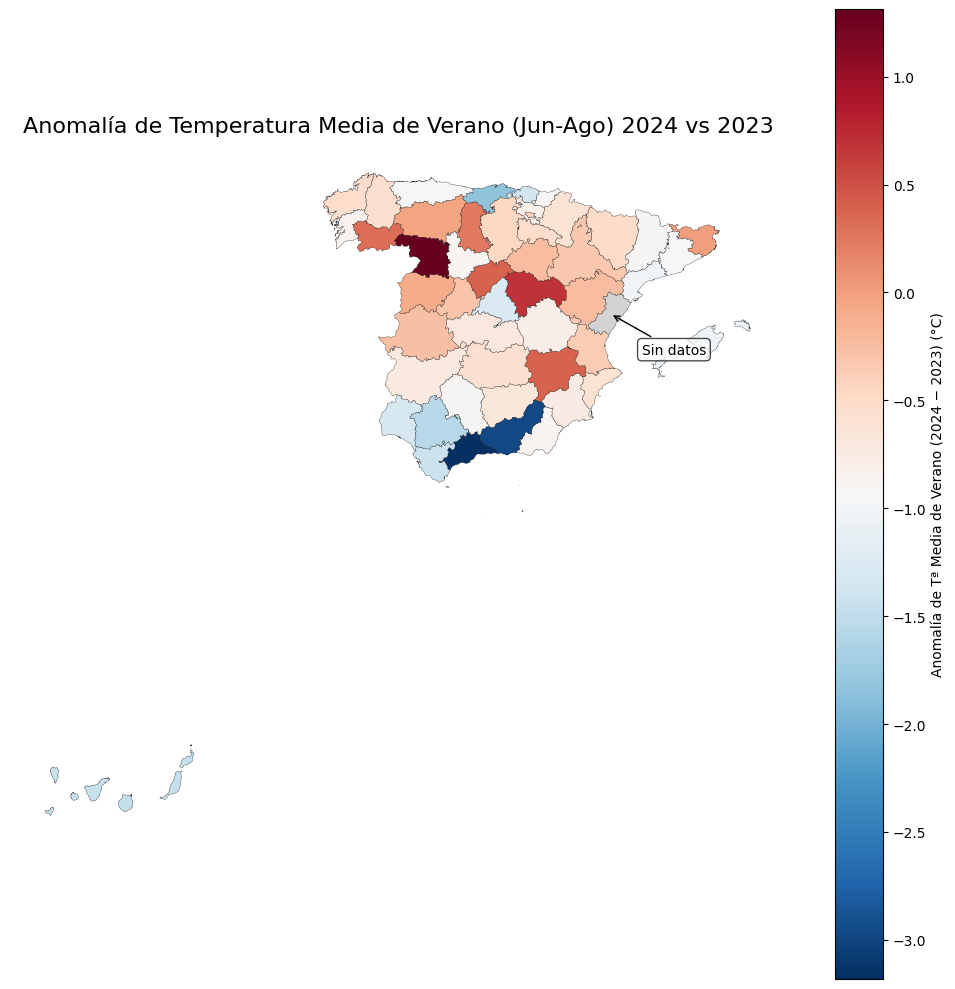

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Cargamos datos de temperaturas limpias y normalizamos provincias
df = pd.read_csv('../data/NUEVO temperaturas_limpias_outliers.csv', parse_dates=['fecha'])
df['provincia'] = df['provincia'].str.strip().str.title()

# Función para filtrar por año y meses
def filtrar_por_fecha(df, anio, meses):
    return df[(df['fecha'].dt.year == anio) & (df['fecha'].dt.month.isin(meses))]

# Obtenemos datos de verano (junio, julio, agosto) para 2023 y 2024
meses_verano = [6, 7, 8]
verano_2023 = filtrar_por_fecha(df, 2023, meses_verano)
verano_2024 = filtrar_por_fecha(df, 2024, meses_verano)

# Calculamos temperatura media de verano por provincia en 2023 y 2024
tmed_verano_2023 = (
    verano_2023
    .groupby('provincia')['tmed']
    .mean()
    .reset_index()
    .rename(columns={'tmed': 'tmed_verano_2023'})
)

tmed_verano_2024 = (
    verano_2024
    .groupby('provincia')['tmed']
    .mean()
    .reset_index()
    .rename(columns={'tmed': 'tmed_verano_2024'})
)

# Unimos y calculamos anomalía (2024 – 2023)
df_anomalia = tmed_verano_2023.merge(tmed_verano_2024, on='provincia', how='inner')
df_anomalia['anomalia'] = df_anomalia['tmed_verano_2024'] - df_anomalia['tmed_verano_2023']

# Cargamos GeoJSON de provincias y normalizamos nombres
gdf_provincias = gpd.read_file('../data/spain-provinces.geojson')
gdf_provincias['provincia'] = gdf_provincias['name'].str.strip().str.title()

# Hacemos merge geográfico para asignar anomalías; quedarán NaN donde no hay datos
gdf_anom = gdf_provincias.merge(df_anomalia[['provincia', 'anomalia']], on='provincia', how='left')

# Dibujamos el mapa, pintando en gris (“lightgrey”) las provincias sin datos
fig, ax = plt.subplots(figsize=(10, 10))
gdf_anom.plot(
    column='anomalia',
    cmap='RdBu_r',
    legend=True,
    edgecolor='black',
    linewidth=0.2,
    ax=ax,
    legend_kwds={
        'label': "Anomalía de Tª Media de Verano (2024 − 2023) (°C)",
        'orientation': "vertical"
    },
    missing_kwds={
        "color": "lightgrey",      # Provincias sin datos van a salir en gris
        "label": "Sin datos"       # Pongo la flechita “Sin datos” a castellon
    } 
)

# Añadimos título y quitamos ejes
ax.set_title('Anomalía de Temperatura Media de Verano (Jun-Ago) 2024 vs 2023', fontsize=16)
ax.axis('off')

# Señalamos con una flecha una provincia sin datos (por ejemplo, Castellón)
#     Busco el centroid de la geometría donde 'anomalia' es NaN
sin_datos = gdf_anom[gdf_anom['anomalia'].isna()]
if not sin_datos.empty:
    # Si hay varias, podemos elegir la primera (ej. Castellón)
    fila = sin_datos.iloc[0]
    centroide = fila.geometry.centroid
    # Agregamos la anotación
    ax.annotate(
        "Sin datos",
        xy=(centroide.x, centroide.y),
        xytext=(centroide.x + 1.0, centroide.y - 1.0),
        arrowprops=dict(arrowstyle="->", color="black"),
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.7)
    )

plt.tight_layout()
plt.show()


Este mapa muestra la diferencia (anomalía) entre la temperatura media del verano (junio–agosto) de 2024 comparada con la de 2023, provincia a provincia. En otras palabras, para cada provincia restamos la media de tmed del verano de 2023 a la media del verano de 2024. El resultado (en grados Celsius) se colorea según la paleta:

En rojo, por ejemplo, aparecen las provincias donde el verano 2024 fue más caluroso que en 2023 (a mayor intensidad de rojo, mayor el aumento).

En azul aparecen las provincias donde el verano 2024 fue más fresco que en 2023 (a mayor intensidad de azul, mayor la caída).

Por ejemplo, Granada está en azul oscuro porque su media veraniega bajó casi 3°C, mientras que Salamanca destaca en rojo intenso porque subió unos 2 °C respecto al año anterior. Provincias casi blancas tuvieron veranos muy parecidos en ambos años.